In [23]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair
import bokeh


%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Outline

* Plots 
    * Bar 
    * Histogram
    * Scatter 
    * Box and whisker
    * Line 
        * Time series
* Extensions
    * Faceting on categorical
    * Stacked bar/histogram
    * Line over scatter
    * Multi color/symbol scatter
    * Multiple line plots
* Modifications
    * Log scaled axes
    * Time labeled axes
    * Histogram bin-width
    * Aspect ratio
    * Axis boundaries


## Basic Plots

### Basic Plots with ggplot2

Data: http://ggplot2.tidyverse.org/reference/mpg.html
Examples: R for data science by Garrett Grolemund and Hadley Wickham
http://r4ds.had.co.nz/visualize.html

In [24]:
%%R

library(tidyverse)
library(ggplot2) 

summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

In [25]:
mpg = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/mpg.csv')

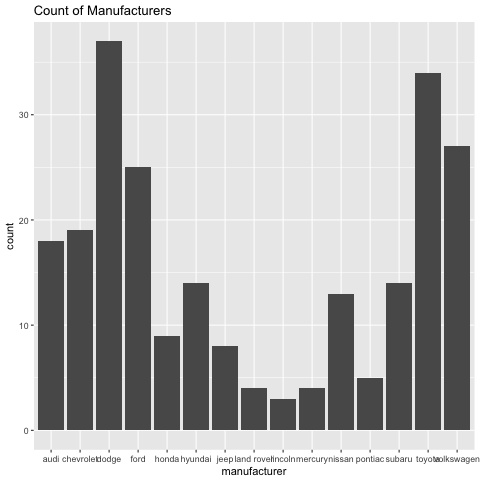

In [26]:
%%R
ggplot(data=mpg) + 
    aes(x=manufacturer) + 
    geom_bar() + 
    ggtitle("Count of Manufacturers")

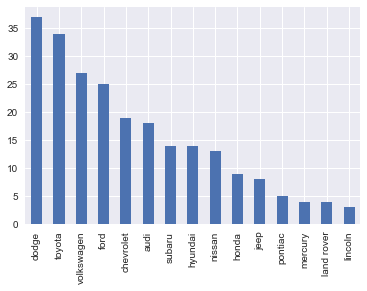

In [28]:
_ = (mpg['manufacturer']
 .value_counts()
 .plot.bar()

);

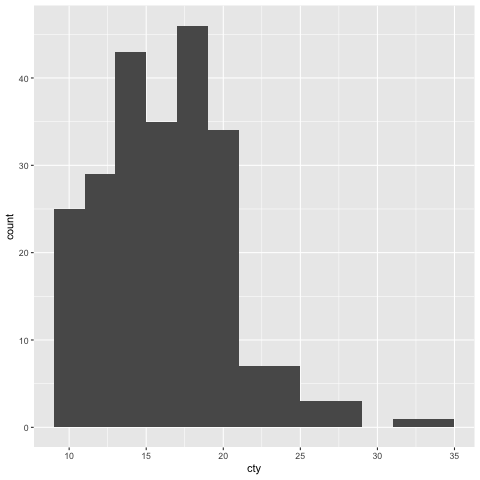

In [29]:
%%R
ggplot(data=mpg) + 
    aes(x=cty) + 
    geom_histogram(binwidth=2)

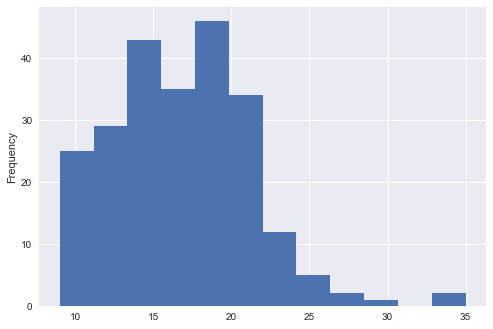

In [66]:
mpg['cty'].plot.hist(bins=12)

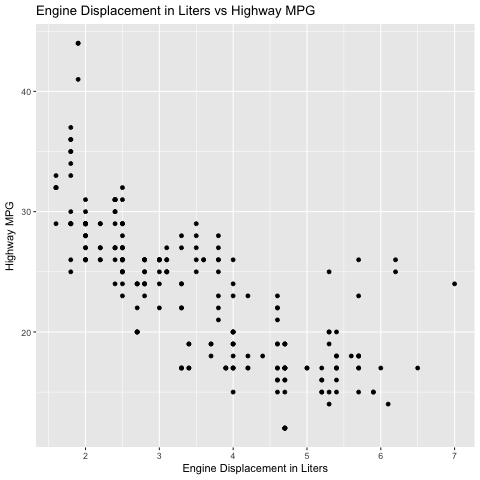

In [36]:
%%R 
ggplot(data = mpg) +
    aes(x = displ, y = hwy) +
    geom_point() + 
    ggtitle("Engine Displacement in Liters vs Highway MPG") +
    xlab("Engine Displacement in Liters") +
    ylab("Highway MPG")

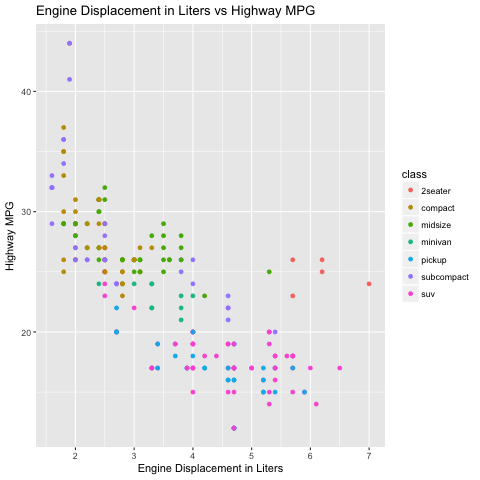

In [38]:
%%R 
ggplot(data = mpg) + 
    aes(x = displ, y = hwy, color = class) +
    geom_point() + 
    ggtitle("Engine Displacement in Liters vs Highway MPG") +
    xlab("Engine Displacement in Liters") +
    ylab("Highway MPG")

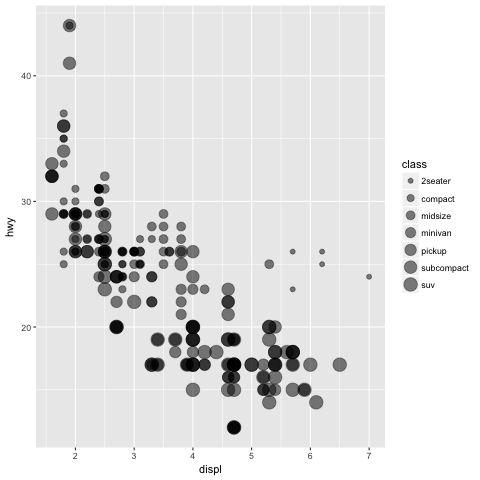

In [43]:
%%R
ggplot(data = mpg) +
    aes(x = displ, y = hwy, size = class) +
    geom_point(alpha=.5)

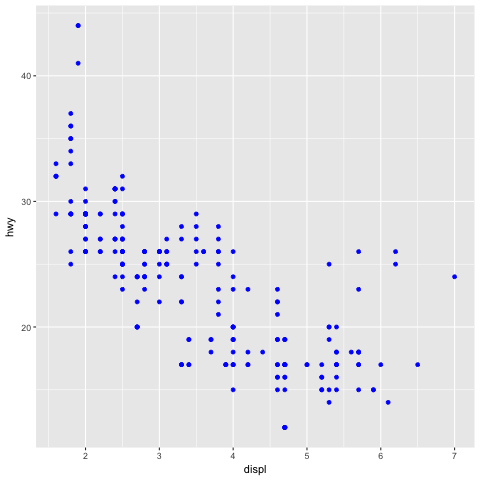

In [13]:
%%R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

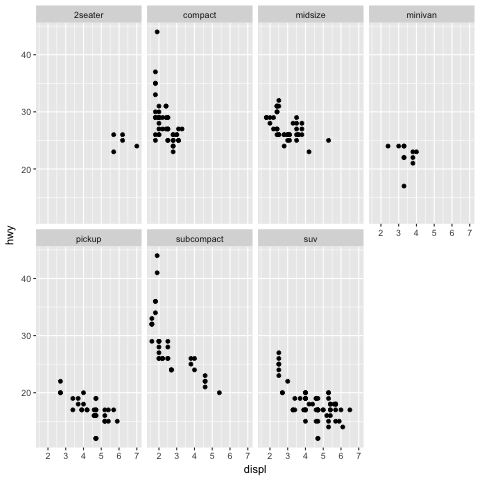

In [14]:
%%R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

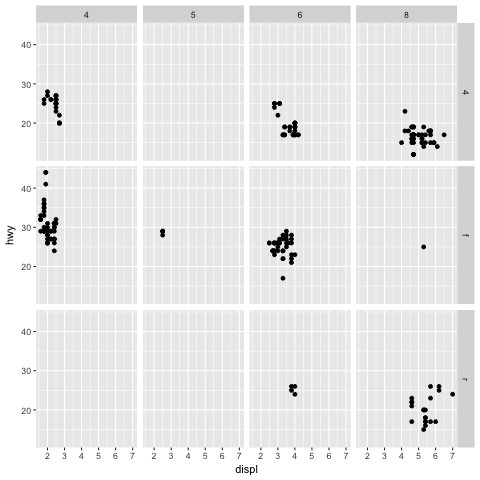

In [15]:
%%R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

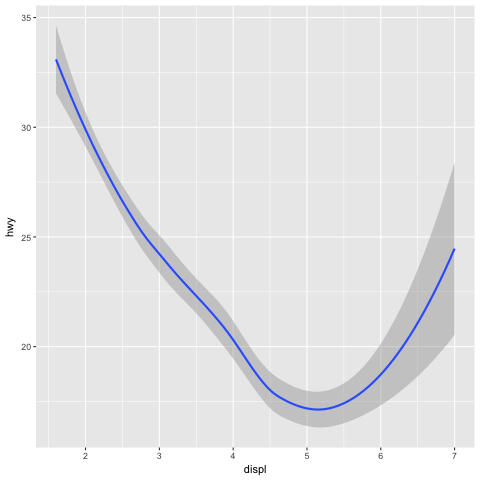

In [46]:
%%R
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

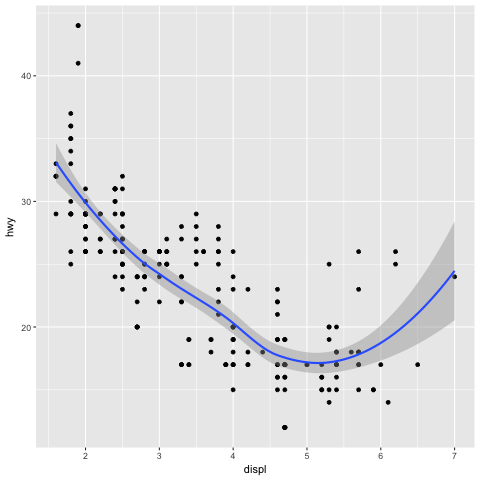

In [18]:
%%R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

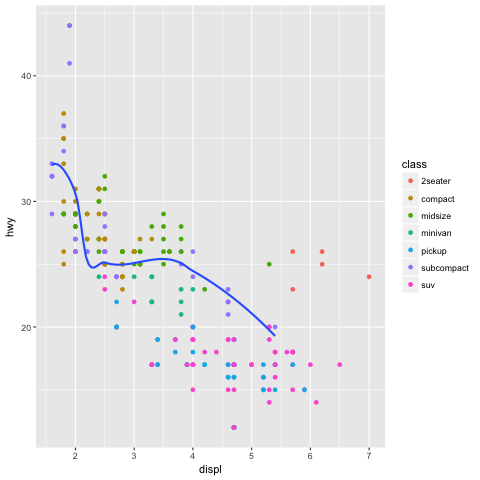

In [19]:
%%R
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

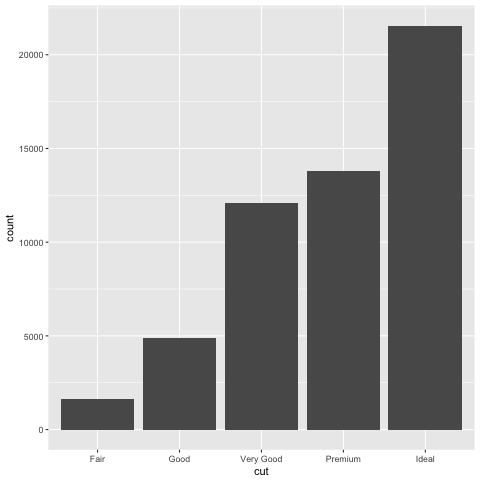

In [22]:
%%R
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

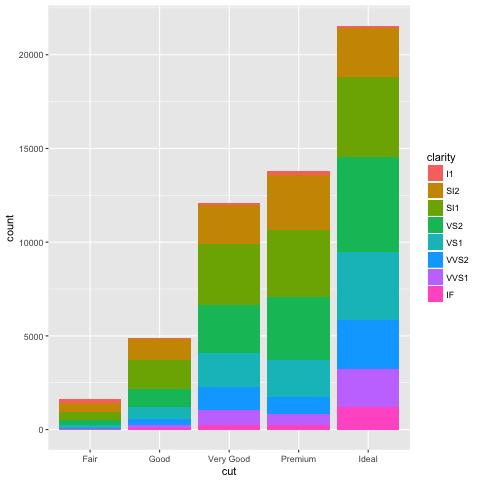

In [21]:
%%R
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

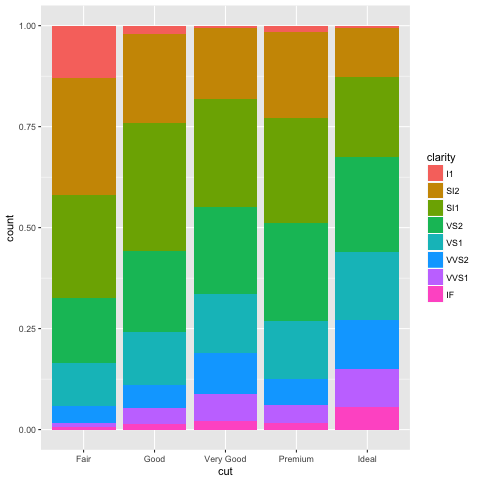

In [23]:
%%R
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

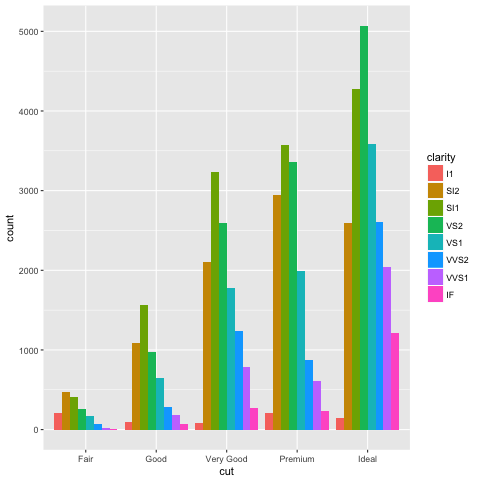

In [24]:
%%R 
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")